## Problem Statement
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.

###  Loading Data and modules

In [291]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score,f1_score, recall_score,accuracy_score, confusion_matrix, classification_report


### Reading titanic dataset

In [292]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [250]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived./

In [293]:
titanic = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [294]:
titanic.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


## Data Visualization: 

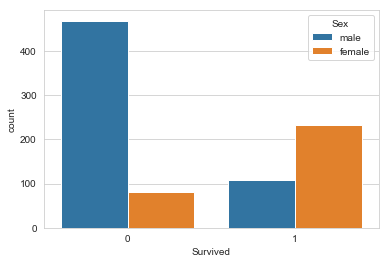

In [296]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=titanic,hue='Sex')

#### Observation:
Females survived more than males.

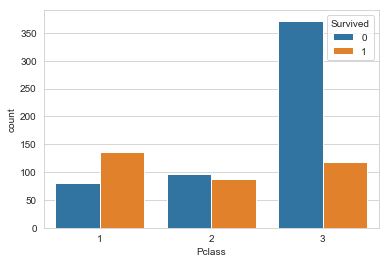

In [290]:
sb.countplot(x='Pclass',data=titanic,hue='Survived')

#### Observation:

1. Almost many people from 3rd class did not survive.

2. Number of survivors from 1st class is high.

## Data pre-processing:


### 1. Identify missing values:

In [253]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


#### From above results, we find the Age featuer has missing values.

In [254]:
titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

The Age feature has 177 missing values.

#### The missing values in Age feature should be replaced with its median.

In [255]:
titanic['Age'].median()

28.0

#### Replacing the null values with value 28.

In [256]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())


In [257]:
titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

No missing values are found.

### 2. Encoding
The categorical values from 'Sex' column should be transformed into numerical values.

male - 1

female - 0

In [258]:
label_quality = LabelEncoder()
titanic['Sex'] = label_quality.fit_transform(titanic['Sex'])
titanic.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


### 3. Feature Scaling

#### Normalising the Age Feature

In [259]:
age_scaler = StandardScaler()
age_scaler.fit(pd.DataFrame(titanic['Age']))
titanic.Age = age_scaler.transform(titanic[['Age']])
titanic.Age.unique()

array([-0.56573646,  0.66386103, -0.25833709,  0.4333115 , -0.1046374 ,
        1.89345853, -2.10273333, -0.18148724, -1.18053521, -1.94903364,
        2.2008579 , -0.71943615,  0.74071088,  1.97030837,  0.12591213,
        0.35646166, -1.10368536, -1.64163427, -0.79628599,  0.81756072,
        2.81565665,  0.97126041, -0.6425863 , -0.87313583, -2.02588348,
       -1.71848411,  1.50920931, -0.02778756,  2.7388068 , -0.06621248,
       -1.8721838 , -1.41108474,  1.20180994, -0.94998568,  0.20276197,
       -1.02683552, -0.33518693, -2.19264764,  0.04906229,  0.27961182,
       -0.48888662, -0.41203677,  1.27865978,  2.27770774,  3.19990586,
        0.58701119,  1.35550962, -1.14211029,  3.16148094,  0.24118689,
       -1.33423489, -1.56478442,  0.54858627,  1.662909  ,  2.00873329,
        0.85598564,  1.12496009, -2.17958317,  2.43140743,  2.04715821,
        1.58605915,  0.51016135,  1.24023486, -0.68101123,  2.50825727,
        0.89441056,  1.73975884,  2.58510712, -0.4504617 , -2.18

#### Normalizing the Fare feature

In [260]:
age_scaler = StandardScaler()
age_scaler.fit(pd.DataFrame(titanic['Fare']))
titanic.Age = age_scaler.transform(titanic[['Fare']])
titanic.Age.unique()

array([-5.02445171e-01,  7.86845294e-01, -4.88854258e-01,  4.20730236e-01,
       -4.86337422e-01, -4.78116429e-01,  3.95813561e-01, -2.24083121e-01,
       -4.24256141e-01, -4.29555021e-02, -3.12172378e-01, -1.13845709e-01,
       -1.87093118e-02, -4.90279793e-01, -3.26266659e-01, -6.19988892e-02,
       -3.86670720e-01, -2.85997284e-01, -5.02948539e-01, -1.24919787e-01,
       -4.86756223e-01,  6.63597416e-02, -1.64441595e-02,  4.64700108e+00,
       -4.89776426e-01, -4.89442190e-01, -9.02720170e-02,  2.30172882e+00,
       -4.92377828e-01, -4.37007438e-01,  1.00606170e+00,  3.98582080e-01,
       -5.02863973e-01, -4.22073541e-01, -4.57645492e-01, -2.25593223e-01,
        1.88762532e-01, -3.36334002e-01, -2.11917743e-01, -2.90024222e-01,
        1.50673744e-01, -4.91371093e-01,  8.96496787e-01,  5.99510151e-01,
       -8.96840841e-02,  2.95895176e-01,  9.62353321e-01,  1.03232136e+00,
       -8.66638810e-02, -3.41452240e-01, -4.84156835e-01, -4.74004926e-01,
        8.31477855e-01, -

## Feature Selection

X - feature variables

y - target variable

In [261]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [262]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [263]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 6)
(712,)
(179, 6)
(179,)


## Decision Tree Classifier
There are couple of algorithms there to build a decision tree , we only talk about a few which are

CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.


ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics.

### 1. Gini Index

In [264]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [265]:
y_pred = dtree.predict(X_test)

In [266]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 36
Accuracy: 0.80


### 2. Entropy and Information Gain

In [267]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [268]:
y_pred = dtree.predict(X_test)

In [269]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 36
Accuracy: 0.80


Here, we find that both Gini Index and Entropy gives the same accuracy. So we can adopt any one criteria. 
So, we can choose Gini Index, since this is a binary classification problem.

## k-fold Cross Validation

In [270]:
cv = KFold(n=len(X), 
           n_folds=10,            
           random_state=12) 
dtree_1 = tree.DecisionTreeClassifier()

fold_accuracy = []
for train_fold, valid_fold in cv:
    train = X.iloc[train_fold] 
    valid = X.iloc[valid_fold] 
    train_y = y.iloc[train_fold]
    valid_y = y.iloc[valid_fold] 
    model = dtree_1.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.7555555555555555, 0.7752808988764045, 0.7415730337078652, 0.7752808988764045, 0.8539325842696629, 0.8426966292134831, 0.7865168539325843, 0.8089887640449438, 0.797752808988764, 0.8089887640449438] 

Average accuracy:  0.7946566791510612


### Observation :
   
   Using 10 folds, the accuracy was found to be 79%

### Cross-validation score

In [242]:
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(random_state=0),     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.74157303 0.74157303 0.74157303 0.79775281 0.85393258 0.84269663
 0.80898876 0.83146067 0.7752809  0.8045977 ]
Average accuracy:  0.7939429161823582


#### k-fold cross validation with max-depth 6

In [276]:
scores = cross_val_score(estimator= tree.DecisionTreeClassifier(max_depth=6,random_state=0),     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())


Accuracy per fold: 
Cross Validation score:  [0.77777778 0.8        0.76404494 0.84269663 0.87640449 0.83146067
 0.79775281 0.76404494 0.84269663 0.80681818]
Average accuracy:  0.8103697083191465


#### Final 10-fold cross validation model with max-depth 6

In [277]:
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
dt_6 = tree.DecisionTreeClassifier(max_depth=6,random_state=0)
fold_accuracy = []
for train_fold, valid_fold in kfold:
    train = X.iloc[train_fold] # Extract training data with cv indices
    valid = X.iloc[valid_fold] # Extract validation data with cv indices
    
    train_y = y.iloc[train_fold]
    valid_y = y.iloc[valid_fold]
    
    model = dt_6.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Decision Tree Classifier Accuracy per fold: ", fold_accuracy, "\n")
print("Decision Tree Classifier Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Decision Tree Classifier Accuracy per fold:  [0.7888888888888889, 0.8202247191011236, 0.8089887640449438, 0.7865168539325843, 0.8426966292134831, 0.797752808988764, 0.8202247191011236, 0.8089887640449438, 0.7303370786516854, 0.7865168539325843] 

Decision Tree Classifier Average accuracy:  0.7991136079900124


Accuracy = 80%

#### Prediction using k-fold model:

In [278]:
#Predict the Survival Class for the Test data
y_pred = dt_6.predict(X_test)
#Prediction Probability
y_pred_proba = dt_6.predict_proba(X_test)

### Performance Measure:

#### a. Accuracy

In [279]:
print('Accuracy Score of Decision Tree Classifier depth 8 : ',accuracy_score(y_test,y_pred))
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy Score of Decision Tree Classifier depth 8 :  0.8324022346368715
Misclassified samples: 30
Accuracy: 0.83


#### b. Confusion Matrix

In [280]:
confusion_matrix(y_test, y_pred)

array([[106,   4],
       [ 26,  43]], dtype=int64)

#### c. Precision

In [281]:
print(precision_score(y_test, y_pred) )

0.9148936170212766


#### d. Recall

In [282]:
print(recall_score(y_test, y_pred) )

0.6231884057971014


#### e. f1-score

In [283]:
print(f1_score(y_test, y_pred) )

0.7413793103448276


In [287]:
print('Classification Report of Decision Tree Classifier depth 6 : ',classification_report(y_test,y_pred))


Classification Report of Decision Tree Classifier depth 6 :               precision    recall  f1-score   support

          0       0.80      0.96      0.88       110
          1       0.91      0.62      0.74        69

avg / total       0.85      0.83      0.82       179



## Conclusion:

1. The Decision Tree was modelled with 10 fold cross validation with max-depth 6.

2. The Accuracy for training data was found to be 80%.

3. The Accuracy for test data was found to be 83%.

4. Precision was 91%.

5. Recall was 62%.

6. f1-score was 74%